# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [ ]:
candidateno=277241 #this MUST be updated to your candidate number so that you get a unique data sample


In [ ]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews


#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [ ]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [ ]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['wong', 'kar', '-', 'wei', "'", 's', '"', 'fallen', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [ ]:
def norm_review(data):
    low_cased = []
    for item in data:
        low_cased.append(item.lower())
    nostop = []
    for item in low_cased:
        if item.isalpha() and item not in stopwords.words('english'):
            nostop.append(item)
    return nostop
norm_review(training_data[0][0])

train_data=[(FreqDist(norm_review(item[0])),item[1]) for item in training_data]
test_data=[(FreqDist(norm_review(item[0])),item[1]) for item in testing_data]

pos_fcount=FreqDist()
neg_fcount=FreqDist()

for item,name in train_data:
    if name=='pos':
        pos_fcount+=item
    else:
        neg_fcount+=item
p_diff = pos_fcount - neg_fcount
n_diff = neg_fcount - pos_fcount

['wong',
 'kar',
 'wei',
 'fallen',
 'angels',
 'purely',
 'visceral',
 'level',
 'one',
 'exciting',
 'films',
 'seen',
 'long',
 'unfortunately',
 'wong',
 'seems',
 'interested',
 'experimenting',
 'camera',
 'creating',
 'tangible',
 'characters',
 'audience',
 'root',
 'ordinarily',
 'alone',
 'would',
 'enough',
 'sink',
 'movie',
 'case',
 'fallen',
 'angels',
 'every',
 'shot',
 'film',
 'exciting',
 'look',
 'wong',
 'really',
 'interesting',
 'things',
 'camera',
 'allow',
 'pyrotechnics',
 'completely',
 'take',
 'case',
 'last',
 'years',
 'dismal',
 'knock',
 'contained',
 'shot',
 'foot',
 'entering',
 'shoe',
 'ugh',
 'movie',
 'follows',
 'three',
 'pairs',
 'lost',
 'souls',
 'struggle',
 'find',
 'meaning',
 'lives',
 'say',
 'much',
 'really',
 'know',
 'going',
 'time',
 'fact',
 'halfway',
 'movie',
 'able',
 'distinguish',
 'character',
 'constantly',
 'moving',
 'camera',
 'really',
 'allow',
 'audience',
 'associate',
 'one',
 'character',
 'always',
 'kept',
 '

a) List of 10 content words which are representative of the **positive** reviewsin the  training data.

In [ ]:
def majority_common_pos(posfreqencies,negfreqencies,peakn):
    diff=posfreqencies-negfreqencies
    sort_diff=diff.most_common()
    words=[item for (item,count) in sort_diff[:peakn]]
    return words

pos_peak=majority_common_pos(pos_fcount,neg_fcount,10)
print(pos_peak)

['film', 'also', 'life', 'great', 'well', 'best', 'story', 'world', 'one', 'many']


b) List of 10 content words which are representative of the **negative** reviews in the training data.

In [ ]:
def majority_common_neg(negfreqencies,posfreqencies,peakn):
    diff=negfreqencies-posfreqencies
    sort_diff=diff.most_common()
    words=[item for (item,count) in sort_diff[:peakn]]
    return words

neg_peak=majority_common_neg(neg_fcount,pos_fcount,10)
print(neg_peak)

['movie', 'bad', 'plot', 'even', 'worst', 'nothing', 'least', 'script', 'could', 'boring']


 c) **explanation**

***norm_review()** function which lowercase's and remove's the stopwords in the given data.The inbuilt function **FreqDist()** in nltk gives  the frequencies of the words.     
*By applying the both above mentioned functions on the training and testing data then I got  **normalised data** with frequencies .  
*After that I stored positive , negative instance(labelled word) frequencies in **pos_fcount and neg_fcount** variable's respectively.  
*With the use of **majority_common_pos and majority_common_neg** functions which takes pos_fcount and neg_fcount as arguments and **generates the list of 10 content words** which are representative of the positive ,negative reviews in the training data respectively.  
*I have done this to divide the positive and negative categories from the movie reviews and selecting the 10  commonly used words in each category .Which are best representative of positive and negative **sentiment** of the movie reviews.It's help to know the what kind of language is linked with negative and positive opinions about movies.

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


# 2 a) word list classifier

In [ ]:
class ListOfWordClassify(ClassifierI):

    def __init__(self, positive, negative):
        self.pos = positive
        self.neg = negative

    def classify(self, review):
        marks = 0
        for word,value in review.items():
            if word in self.pos:
                marks+=value
            if word in self.neg:
                marks-=value

        if marks > 0 :
            return "pos"
        else:
            return "neg"

    def classes(self):
        return ("pos", "neg")

In [ ]:
classifier = ListOfWordClassify(pos_peak, neg_peak)
print(classifier.classify(FreqDist("the film was great".split())))# example for positive review
print(classifier.classify(FreqDist("the movie was worst".split())))# example for negative review

pos
neg


2. b)**explanation**


*I have created a **Binary Classifier** which classifies the given data as Positive or Negative review.  
***ListOfWordClassify** is a class **inherited from ClassifierI in NLTK**. The **classify()** method in the class will classifies the reviews into positive or negative.  
*If the frequency count of words are **greater than 0** then it classifies as positive review or **lesser than 0** as negative review.  
***classes()** method is used to give labels to reviews.

3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

# 3 a)The accuracy, precision, recall and F1 score of word list classifier.

In [ ]:
from nltk.classify.api import ClassifierI
def accuracy_cal(cls, t_data):
    accuracy = 0
    review,original=zip(*t_data)
    predictions=cls.classify_many(review)
    for prediction,orglabel in zip(predictions,original):
        if prediction==orglabel:
            accuracy+=1

    return accuracy / (len(t_data))

class Evaluater:
    def __init__(self, predictions, original, labels=("pos", "neg")):
        (self.lab1, self.lab2) = labels
        self.TP = 0
        self.FP = 0
        self.FN = 0
        self.TN = 0
        for pred, org in zip(predictions, original):
            if org == self.lab1:
                if pred == self.lab1:
                    self.TP += 1
                else:
                    self.FN += 1
            elif pred == self.lab1:
                self.FP += 1
            else:
                self.TN += 1

    def _precision(self):
        prec = self.TP / (self.TP + self.FP)
        return prec

    def _recall(self):
        rec = self.TP / (self.TP + self.FN)
        return rec

    def _f1(self):
        prec = self._precision()
        rec = self._recall()
        f1 = (2 * prec * rec) / (prec + rec)
        return f1

In [ ]:
review,original = zip(*test_data)
predictions = classifier.classify_many(review)
evaluater = Evaluater(predictions, original)
accuracy = accuracy_cal(classifier,test_data)
wc_precision = evaluater._precision()
wc_recall = evaluater._recall()
wc_f1_score = evaluater._f1()

print(f"Accuracy: {accuracy}")
print(f"Precision: {wc_precision}")
print(f"Recall: {wc_recall}")
print(f"F1 Score: {wc_f1_score}")

Accuracy: 0.6433333333333333
Precision: 0.5964125560538116
Recall: 0.8866666666666667
F1 Score: 0.7131367292225201


3. b) explanation

*It's reasonable to evaluate the accuracy of a classifier if the classes in the dataset are **balanced**.Accuracy gives the correctness of the classifier we are working with.  
*scenrio where we need to reasonable evaluate the accuracy is when we have balanced classes as almost same number of positive and negative instances.For instance, having 70 positive and negative instances each then the classifier  predicts correctly 50 positive and 50 negative reviews, the accuracy comes to be 75% .  
*contrary, to that it's not reasonable in imbalanced classes.Accuracy might be not a good measure in terms of **imbalanced classes**.For example, having 80 positive instances and 20 negative instances, it predicts all instances as positive which have accuracy of 80% but it is **failing to classify the negative classes**.  
*In terms of imbalanced classes **precision,recall and F1 score** gives  more detailed view of classifier otherthan **accuracy alone**.   


4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

# 4 a)Naive Bayes classifier.

In [ ]:
from nltk.classify import NaiveBayesClassifier
train_fit = NaiveBayesClassifier.train(train_data)
out_naiveb =train_fit.classify_many(review)

eva_naiveb = Evaluater(out_naiveb,original)
nai_precision = eva_naiveb._precision()
print("precision :",eva_naiveb._precision())
nai_recall = eva_naiveb._recall()
print("Recall :",eva_naiveb._recall())
nai_f1_score = eva_naiveb._f1()
print("F1 score :",eva_naiveb._f1())


precision : 0.6413043478260869
Recall : 0.9833333333333333
F1 score : 0.7763157894736841


4. b) comparing the results of  word list classifier and naive bayes classifier.

In [ ]:
precision_com = wc_precision - nai_precision
recall_com = wc_recall - nai_recall
f1_score_com = wc_f1_score - nai_f1_score

dic = {"List of words classifier":[wc_precision,wc_recall,wc_f1_score],"Naive Bayes classifier":[nai_precision,nai_recall,nai_f1_score],"compared results" :[precision_com,recall_com,f1_score_com]}
print("the individual and compared results of word list classifier and Naive Bayes classifier as follows",dic)

the compared results of word list classifier and Naive Bayes classifier as follows {'List of words classifier': [0.5964125560538116, 0.8866666666666667, 0.7131367292225201], 'Naive Bayes classifier': [0.6413043478260869, 0.9833333333333333, 0.7763157894736841], 'compared results': [-0.044891791772275313, -0.09666666666666657, -0.06317906025116393]}


In [ ]:
dataframe = pd.DataFrame(dic,index =["precision",'recall',"f1_score"] )
dataframe

,List of words classifier,Naive Bayes classifier,compared results
precision,0.596413,0.641304,-0.044892
recall,0.886667,0.983333,-0.096667
f1_score,0.713137,0.776316,-0.063179


# results discussion

*As we can see the **precision(0.596413)** of word list classifier is lesserthan the precision of **Naive Bayes classifier(0.641304)** almost **5%** .  
*In terms of **recall(0.886667)** of word list classifier again it's around **10%** smaller than the recall of Naive Bayes classifier **(0.983333)**.  
***F1_score of Naive Bayes classifier(0.776316)** is **6%** greater than the list of word classifier **F1_score(0.713137)**.
*In all aspects the Naive bayes classifier had **higher percentage** than word list classifier.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


# 5 a)impact of the length of the wordlists on the wordlist classifier.

In [ ]:
acc = []
pre = []
rec =[]
f1s = []
for i in range(1,101):
    pos_peak = [k[0] for k in p_diff.most_common(i)]
    neg_peak = [k[0] for k in n_diff.most_common(i)]
    cl = ListOfWordClassify(pos_peak,neg_peak)
    pred = cl.classify_many(review)
    ev = Evaluater(pred,original)
    acc.append(accuracy_cal(cl,test_data))
    pre.append(ev._precision())
    rec.append(ev._recall())
    f1s.append(ev._f1())



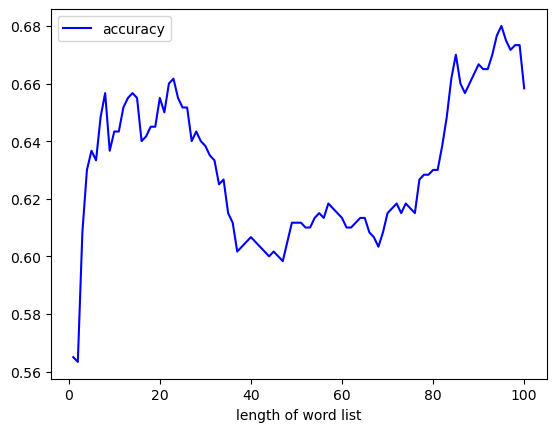

In [ ]:
len_listofwords = list(range(1,101))
plt.plot(len_listofwords,acc,label = "accuracy",color = "blue")
plt.xlabel("length of word list")
plt.legend()
plt.show()

*As the length of  the words is at 0 to 10 there is rapid increase in the accuracy from 10 to 25 there is many fluctuations.
*after 25 to 40 there is more depression in the accuracy of the data .  
*from 80 to 100 words there is peak increase in the accuracy with small fluctuations.

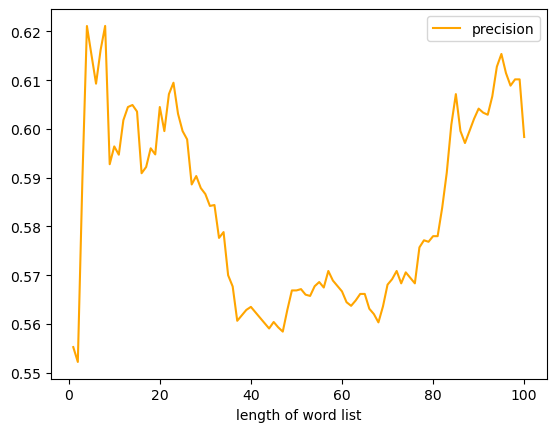

In [ ]:
len_listofwords = list(range(1,101))
plt.plot(len_listofwords,pre,label = "precision",color = "orange")
plt.xlabel("length of word list")
plt.legend()
plt.show()

*As the length of  the words is at 0 to 15 there is rapid increase in the precision from 15 to 30 there is many fluctuations.
*after 30 to 50 there is more depression in the precision of the data .  
*from 80 to 100 words there is peak increase in the precision with some fluctuations.

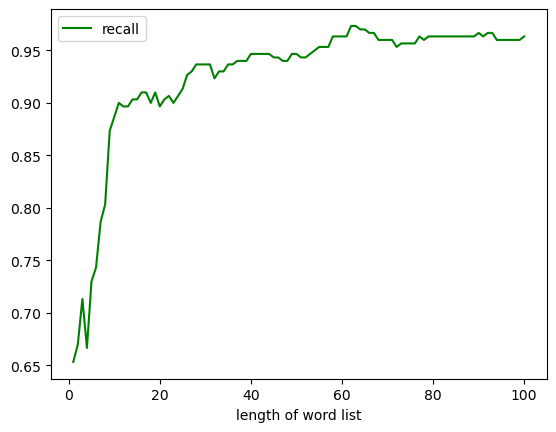

In [ ]:
len_listofwords = list(range(1,101))
plt.plot(len_listofwords,rec,label = "recall",color = "green")
plt.xlabel("length of word list")
plt.legend()
plt.show()

*As the length of  the words is at 0 to 10 there is rapid increase in the recall from 10 to 100 there is many fluctuations.   
*.there is steadly constant throughout the 10 to 100 words

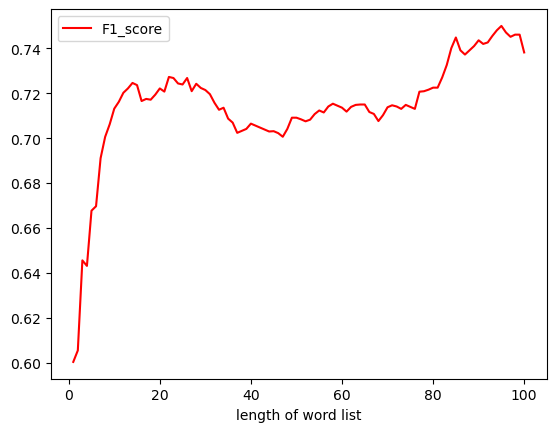

In [ ]:
len_listofwords = list(range(1,101))
plt.plot(len_listofwords,f1s,label = "F1_score",color = "red")
plt.xlabel("length of word list")
plt.legend()
plt.show()

*As the length of  the words is at 0 to 20 there is rapid increase in the f1 from 10 to 25 there is many fluctuations.
*after 40  to 60 there is some depressions in the f1 of the data .  
*from 80 to 100 words there is someincrease in the f1 with small fluctuations.

5.b) my recommendation

*I would recommend a Naive Bayes classifier otherthan the word list classifier for future work in sentimental analysis.  
*As we can see the precision,recall and F1_score of the Naive Bayes classifier is more than as compared to word list classifier.
*for dealing with complex sentiment analysis task , the naive bayes classifier performs better on unseen data so, a Naive Bayes classifier is best for works in sentiment analysis.

In [ ]:
##This code will word count all of the markdown cells in the notebook saved at filepath

import io
from nbformat import current

from google.colab import drive
drive.mount('/content/drive')

filepath="/content/drive/MyDrive/Colab Notebooks/ANLPassignment2023.ipynb"
question_count=432

with io.open(filepath, 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')

word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print("Submission length is {}".format(word_count-question_count))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Submission length is 0
